In [77]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import pandas as pd
import os
import fnmatch
import PIL.Image as Image

# tmp unused
from scipy.fft import fft, fftfreq
from scipy.signal import blackman, hamming, detrend
import scipy.signal as signal

In [105]:
# change the path_root here
# path_root = '/Volumes/homes/_NeuralData/Changgung_BIS/4.13'
path_root = '/Volumes/homes/_NeuralData/Changgung_BIS/4.24'
# path_root = 'Other path'

fs = 1000

In [81]:
data_info = {}
exp = os.listdir(path_root)
exp.sort()
exp

['.DS_Store',
 '2023-04-24_151247_1',
 '2023-04-24_160704',
 '2023-04-24_164655',
 '2023-04-24_172028']

path_tmp /Volumes/homes/_NeuralData/Changgung_BIS/4.24/2023-04-24_164655/EP
csv_list ['/Volumes/homes/_NeuralData/Changgung_BIS/4.24/2023-04-24_164655/EP/CA_46_B1_BF_97_28-1.csv', '/Volumes/homes/_NeuralData/Changgung_BIS/4.24/2023-04-24_164655/EP/CA_46_B1_BF_97_28-2.csv', '/Volumes/homes/_NeuralData/Changgung_BIS/4.24/2023-04-24_164655/EP/CA_46_B1_BF_97_28-3.csv', '/Volumes/homes/_NeuralData/Changgung_BIS/4.24/2023-04-24_164655/EP/CA_46_B1_BF_97_28-4.csv', '/Volumes/homes/_NeuralData/Changgung_BIS/4.24/2023-04-24_164655/EP/CA_46_B1_BF_97_28-5.csv']
eeg.shape (5, 974947)
duration(s): 974.947
<Info | 7 non-empty values
 bads: []
 ch_names: EEG0, EEG1, EEG2, EEG3, EEG4
 chs: 5 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 5
 projs: []
 sfreq: 1000.0 Hz
>
Creating RawArray with float64 data, n_channels=5, n_times=974947
    Range : 0 ... 974946 =      0.000 ...   974.946 secs
Ready.


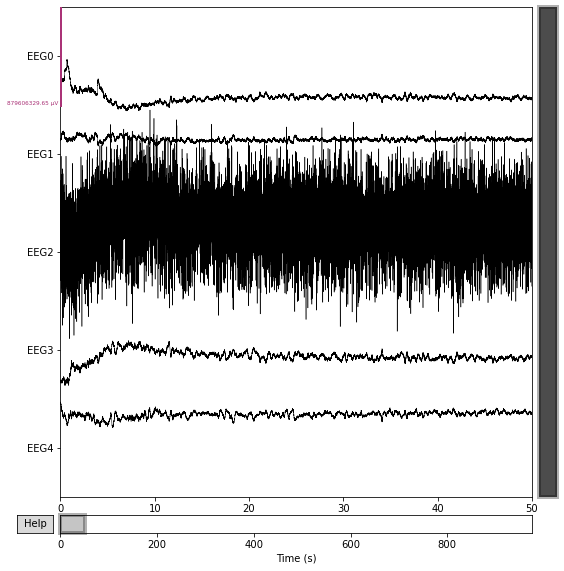

Effective window size : 2.048 (s)


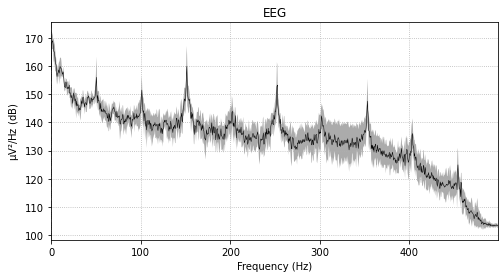

Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/t1/8nly90wx3dgbs59hy6n2shvw0000gn/T/ipykernel_29518/1868432815.py:55: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  my_raw.plot_psd(fmax=499, average=False, picks=[c], ax=ax)


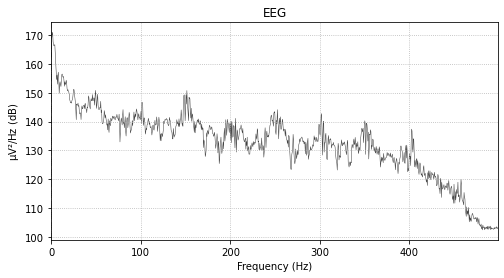

Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/t1/8nly90wx3dgbs59hy6n2shvw0000gn/T/ipykernel_29518/1868432815.py:55: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  my_raw.plot_psd(fmax=499, average=False, picks=[c], ax=ax)


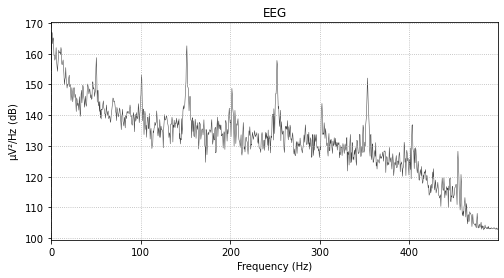

Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/t1/8nly90wx3dgbs59hy6n2shvw0000gn/T/ipykernel_29518/1868432815.py:55: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  my_raw.plot_psd(fmax=499, average=False, picks=[c], ax=ax)


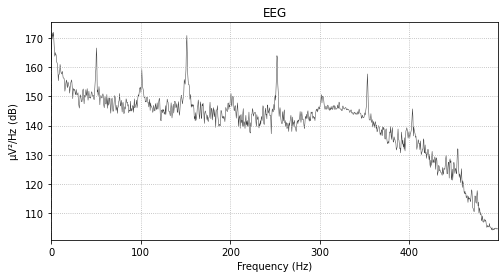

Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/t1/8nly90wx3dgbs59hy6n2shvw0000gn/T/ipykernel_29518/1868432815.py:55: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  my_raw.plot_psd(fmax=499, average=False, picks=[c], ax=ax)


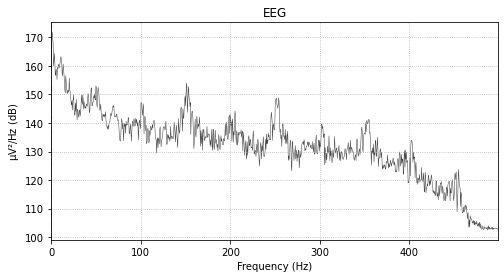

Effective window size : 2.048 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/t1/8nly90wx3dgbs59hy6n2shvw0000gn/T/ipykernel_29518/1868432815.py:55: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  my_raw.plot_psd(fmax=499, average=False, picks=[c], ax=ax)


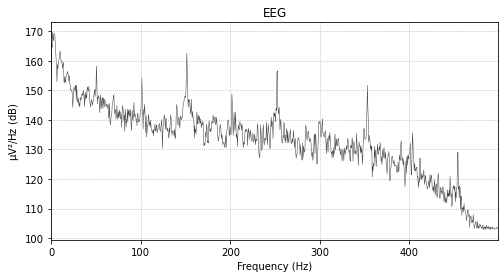

In [114]:
data_info = {}
exp = os.listdir(path_root)
exp.sort()

# for i in range(len(exp)):
for i in range(3,4):
    path_tmp = '{}/{}/EP'.format(path_root, exp[i])
    print('path_tmp', path_tmp)
    if os.path.exists(path_tmp):
        csv_list = []
        for root, _, filenames in os.walk(path_tmp):
            for filename in fnmatch.filter(filenames, '*.csv'):
                csv_list.append(os.path.join(root, filename))
        csv_list.sort()
        print('csv_list', csv_list)
    else:
        continue

    # read data of NeuraMatrix
    eeg = []
    for c in range(len(csv_list)):
        df = pd.read_csv('{}'.format(csv_list[c]), header=None)
        eeg.append(df[2])
    eeg = np.array(eeg)

    # eeg -= eeg[0,:]
    eeg -= np.mean(eeg[[0,1,3,4], :], axis=0)

    print('eeg.shape', eeg.shape)
    print('duration(s):', eeg.shape[1]/fs)
    data_info['exp{}_duration'.format(i)] = eeg.shape[1]/fs

    # some case are not 5 channel
    # ch_num = 5
    ch_num = eeg.shape[0]
    # for mne object
    ch_names = ['EEG{}'.format(i) for i in range(ch_num)]
    ch_types = ['eeg' for i in range(ch_num)]
    info = mne.create_info(ch_names, ch_types=ch_types, sfreq=fs)
    print(info)

    data_info['exp{}_chnum'.format(i)] = eeg.shape[0]
    data_info['exp{}_filename'.format(i)] = path_tmp[46:-3]

    my_raw = mne.io.RawArray(eeg, info)
    # fig, ax = plt.subplots(figsize=(6, 6))
    my_raw.plot(duration=50, remove_dc=False, scalings='auto')
    # fig.savefig('./figs/exp{}_eeg.png'.format(i+1), dpi=300)
    fig, ax = plt.subplots(figsize=(8, 4))
    my_raw.plot_psd(fmax=499, average=True, ax=ax)
    fig.savefig('./figs/4.24/exp{}_psd.png'.format(i), dpi=300)

    for c in ch_names:
        fig, ax = plt.subplots(figsize=(8, 4))
        my_raw.plot_psd(fmax=499, average=False, picks=[c], ax=ax)
        fig.savefig('./figs/4.24/exp{}_psd_ch{}.png'.format(i, c), dpi=300)

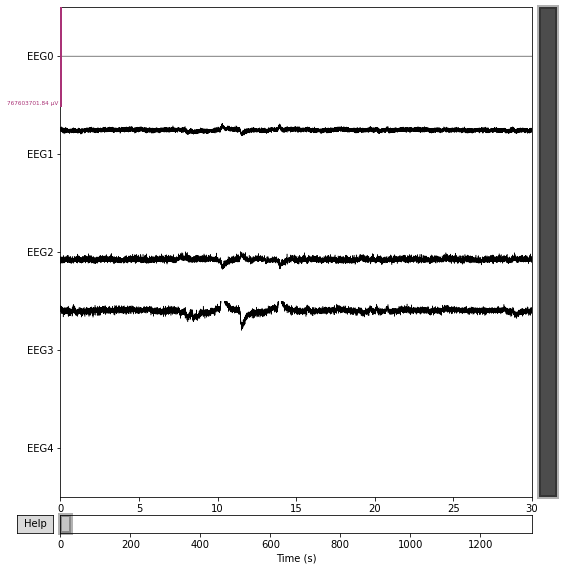

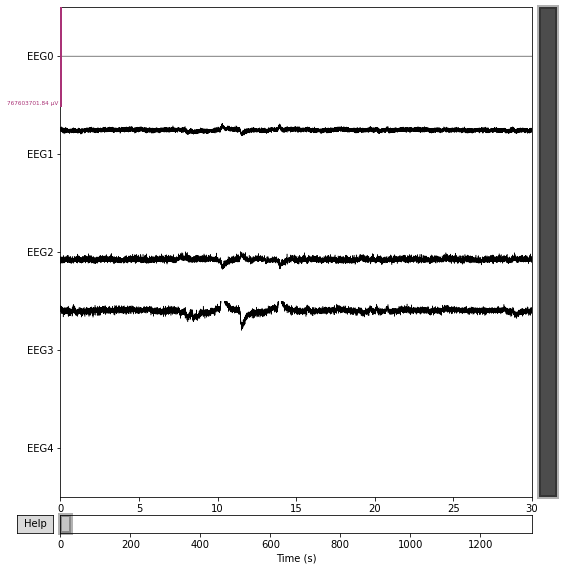

In [108]:
my_raw.plot(start=0, duration=30, remove_dc=False, scalings='auto')

In [98]:
data_info

{'exp4_duration': 744.027,
 'exp4_chnum': 5,
 'exp4_filename': '2023-04-24_172028'}

In [49]:
eeg.shape

(5, 8624379)

In [100]:
def image_compose(imgs, cols, rows, size_x, size_y, exp_id):
    to_image = Image.new('RGB', (cols * size_x, rows * size_y)) 
     # 创建一个新图

    # 循环遍历，把每张图片按顺序粘贴到对应位置上

    for y in range(1, rows + 1):

        for x in range(1, cols + 1):
            from_image = Image.open(imgs[cols * (y - 1) + x - 1]).resize(

                (size_x, size_y), Image.ANTIALIAS)

            to_image.paste(from_image, ((x - 1) * size_x, (y - 1) * size_y))

    return to_image.save('./figs/4.24/exp{}_psd_all.png'.format(exp_id))  # 保存新图

In [115]:
# 获取图片集地址下的所有图片名称
exp_id = 3
ch_num = 5
imgs = []
imgs.append('./figs/4.24/exp{}_psd.png'.format(exp_id))
for c in range(ch_num):
    imgs.append('./figs/4.24/exp{}_psd_chEEG{}.png'.format(exp_id, c))

# 定义图像拼接函数

image_compose(imgs, cols=3, rows=2, size_x=2400, size_y=1200, exp_id=exp_id)  # 调用函数


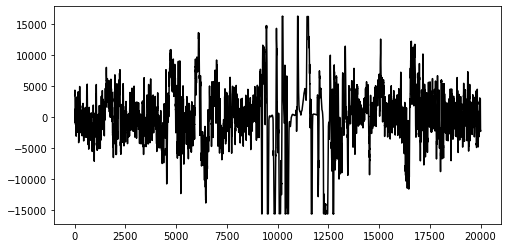

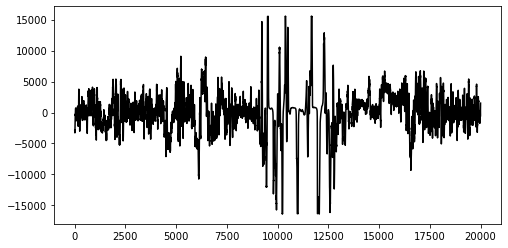

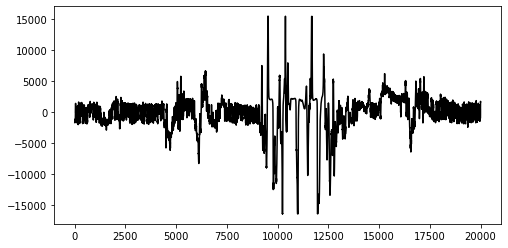

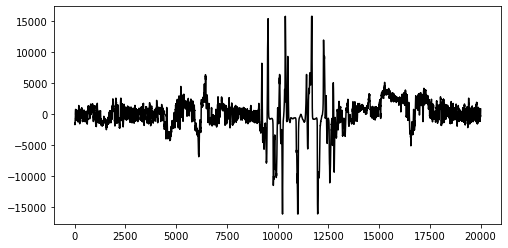

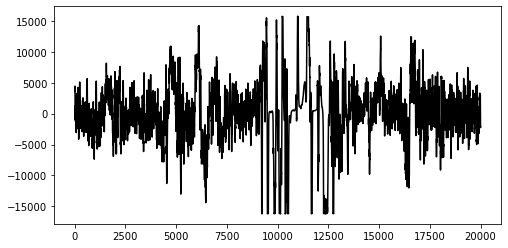

In [57]:
mon_s = 200
mon_e = 220
for i in range(eeg.shape[0]):
    plt.figure(figsize=(8,4))
    plt.plot(eeg[i, mon_s*fs:mon_e*fs] - np.mean(eeg[i, mon_s*fs:mon_e*fs]), label='ch{}'.format(i), color='k')
    plt.show()

In [30]:
# filters: to be used later
# my_raw.filter(l_freq=1, h_freq=35, picks=['EEG'])
# my_raw.notch_filter(freqs=[50,90,150], picks=['EEG'])
# my_raw.filter(l_freq=100, h_freq=499, picks=['EMG'])